In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [82]:
n_pts = 500
centers = [ [-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, Y = datasets.make_blobs( n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)

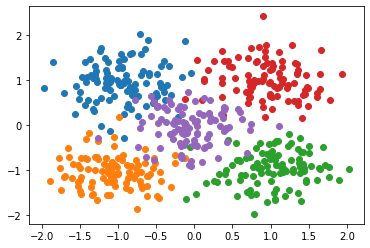

In [83]:
plt.scatter(X[Y==0,0], X[Y==0, 1])
plt.scatter(X[Y==1,0], X[Y==1, 1])
plt.scatter(X[Y==2,0], X[Y==2, 1])
plt.scatter(X[Y==3,0], X[Y==3, 1])
plt.scatter(X[Y==4,0], X[Y==4, 1])

In [90]:
y_categorical = to_categorical(Y, 5)

In [85]:
model = Sequential()
model.add(Dense(units = 5 , input_shape=(2,), activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [86]:
h = model.fit(x=X, y=y_categorical, verbose=0, batch_size = 50, epochs = 100)

In [87]:
def plot_decision_boundary(X, Y, model):
  margin = 0.5
  x_span = np.linspace(min(X[:, 0]) - margin, max(X[:, 0]) + margin)
  y_span = np.linspace(min(X[:, 1]) - margin, max(X[:, 1]) + margin)
  xx, yy = np.meshgrid(x_span , y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred_func = np.argmax(model.predict(grid),axis=1)
  z= pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

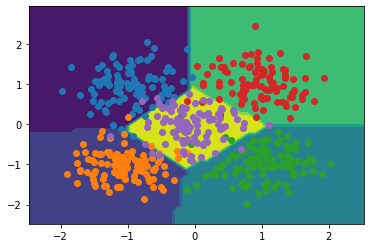

In [88]:
plot_decision_boundary(X, y_categorical, model)

plt.scatter(X[Y==0,0], X[Y==0, 1])
plt.scatter(X[Y==1,0], X[Y==1, 1])
plt.scatter(X[Y==2,0], X[Y==2, 1])
plt.scatter(X[Y==3,0], X[Y==3, 1])
plt.scatter(X[Y==4,0], X[Y==4, 1])

Prediction is :  [3]


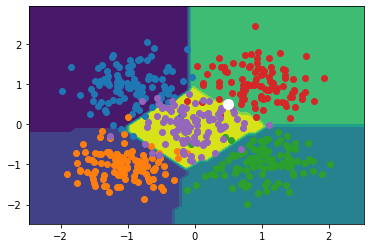

In [89]:
plot_decision_boundary(X, y_categorical, model)

plt.scatter(X[Y==0,0], X[Y==0, 1])
plt.scatter(X[Y==1,0], X[Y==1, 1])
plt.scatter(X[Y==2,0], X[Y==2, 1])
plt.scatter(X[Y==3,0], X[Y==3, 1])
plt.scatter(X[Y==4,0], X[Y==4, 1])

x= 0.5
y= 0.5

point_test = np.array([[x,y]])
prediction = np.argmax(model.predict(point_test),axis=1)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'white')
print("Prediction is : ", prediction)